## 1) Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/bourne_scenario.csv")

In [3]:
df.head()

,page_no,scene_title,text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...


#### Feature Description
- page_no : 데이터가 위치한 pdf 페이지 정보
- scene_title : 씬 제목
- text : 씬에 해당하는 지문/대본 텍스트 정보

-----

## 2) 데이터셋 살펴보기

### 2-1) 기본 정보 탐색

##### 데이터셋 기본 정보 탐색

In [4]:
df.shape

(320, 3)

In [5]:
df.isnull().sum()

page_no        0
scene_title    0
text           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   page_no      320 non-null    int64 
 1   scene_title  320 non-null    object
 2   text         320 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.6+ KB


In [7]:
df['text'][0]

" 1                It's raining...                Light strobes across the wet glass at a rhythmic pace...                 Suddenly -- through the window a face -- JASON BOURNE --               riding in the backseat -- his gaze fixed.      "

-----

## 3) 텍스트 데이터 전처리

### 3-1) 정규 표현식 적용

In [8]:
import re

In [9]:
def apply_regular_expression(text):
    text = text.lower()
    english = re.compile('[^ a-z]') #compile = []안의 조건을 제외하고 제거
    result = english.sub('', text) #english([^ a-z])로 컴파일한 text를 비어있는 변수 result 의 ''와 바꾸어라
    result = re.sub(' +', ' ', result)
    return result

    #sub(old, new, x):x에나오는 old문자를 new문자로 바꾸기

In [10]:
apply_regular_expression(df['text'][0])

' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed '

In [11]:
df['processed_text'] = df.apply(lambda x : apply_regular_expression(x['text']), axis=1)
df

,page_no,scene_title,text,processed_text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...
...,...,...,...,...
315,119,356 EXT. HOUSING PROJECT PLAYGROUND --...,356 BOURNE trudging along. Ac...,bourne trudging along across the snow hes don...
316,121,357 INT. HOSPITAL ROOM -- DAY,357 BOURNE waking up -- sittin...,bourne waking up sitting up where is he tryin...
317,121,358 INT. HOSPITAL CORRIDOR -- DAY,"358 Long, sterile hallway. CR...",long sterile hallway cronin and nicky standin...
318,121,359 INT. HOSPITAL ROOM -- DAY,359 Empty bed. Open window. ...,empty bed open window bourne is gone as the m...


### 3-2) Word Count

##### 말뭉치(코퍼스) 생성

In [41]:
corpus = df['processed_text'].tolist() 
corpus[:5]

[' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed ',
 ' a on his knee a syringe and a gun the eyes of the driver jarda watching bournes pov the passenger back of his head cell phone rings the head turns its conklin bourne returns his stare ',
 ' bournes eyes open panicked gasping trying to stay quiet marie sleeps ',
 ' a bourne moving for the medicine cabinet digs through the medicine cabinet downs something specific ',
 ' one minute later bourne moves out onto the veranda marie pads in watching him for a moment concerned clearly its not the first time this has happened they both look different than last we saw them his hair is longer shes a blonde hippie travelers their cottage is humble but sweet the bedroom opens to a beach and a town just down the hill club music from some all night rave wafting in from the far distance marie where were you jason bourne in the car conklin up fro

##### BoW 벡터 생성

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vect = CountVectorizer(tokenizer= None, stop_words='english', analyzer='word')
#tokenizer = 단어나 문장을 어떻게 나눌(처리할)것인지, stop_words = the 와 같은 의미없는 단어 처리, amalyzer = 'word' word단위로 분석
bow_vect = vect.fit_transform(corpus)  #fit(df['processed_text'])가능
count_list = bow_vect.toarray().sum(axis = 0)
word_list = vect.get_feature_names()

In [15]:
word_list[:5]

['aa', 'ab', 'abandoned', 'abandons', 'abbott']

In [16]:
count_list[:5]

array([  3,   3,   2,   1, 128])

In [17]:
bow_vect.shape #320개의 문장, 2850개의 단어

(320, 2850)

In [18]:
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
bow_vect.toarray().sum(axis = 0)

array([ 3,  3,  2, ...,  1, 42,  3])

In [20]:
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100]) #dict는 [:5]불가능 >  str로 출력, [:100]>100번째가 아닌 100글자

{'aa': 3, 'ab': 3, 'abandoned': 2, 'abandons': 1, 'abbott': 128, 'abbottnow': 1, 'abbottphone': 4, '


In [21]:
import operator

In [22]:
sorted(word_count_dict.items(), key = operator.itemgetter(1), reverse=True)[:5]
#key = operator.itemgetter(1)  : 0번째로 가져오는 word가 아닌, count를 기준으로 sorted, reverse=True : 큰수부터

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93)]

##### 단어 분포 탐색

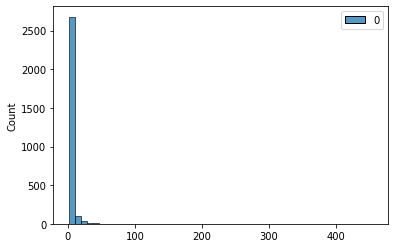

In [23]:
sns.histplot(word_count_dict.values(), bins=50)#count가 50이하인word가 대부분

-----

## 4) 텍스트 마이닝

### 4-1) 단어별 빈도 분석

##### 워드 클라우드 시각화

In [24]:
!pip install pytagcloud pygame simplejson #라이브러리 설치

     |████████████████████████████████| 757kB 3.5MB/s 
     |████████████████████████████████| 11.4MB 14.4MB/s 
     |████████████████████████████████| 133kB 45.4MB/s 
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-cp36-none-any.whl size=759869 sha256=9beff6d181ccbc2727083b01641168f7832e0f82482494f6ccd1ed2eeb416b5a
  Stored in directory: /root/.cache/pip/wheels/08/bf/d4/8899fd82d7f62af5960d17cc59b80edae474380b92828c8c1f
Successfully built pytagcloud


In [25]:
from collections import Counter
import random
import pytagcloud

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


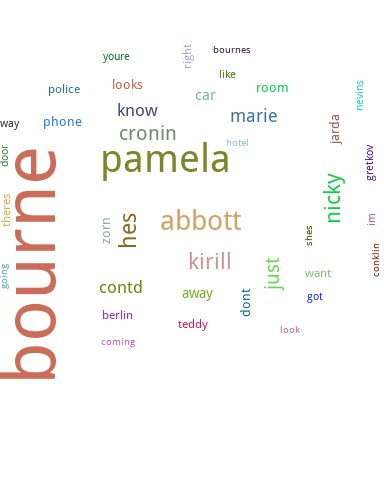

In [26]:
ranked_tags = Counter(word_count_dict).most_common(40)  #sorted(word_count_dict.items(), key = operator.itemgetter(1), reverse=True)[:40]
#Counter를 이용하여 list형태로
taglist = pytagcloud.make_tags(ranked_tags, maxsize=70)  #maxsize = 글자크기
pytagcloud.create_tag_image(taglist,'wordcloud.jpg', rectangular=False)
from IPython.display import Image
Image('wordcloud.jpg')

##### 상위 빈도수 단어 출력

In [27]:
ranked_tags

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93),
 ('nicky', 90),
 ('cronin', 81),
 ('just', 80),
 ('marie', 67),
 ('contd', 63),
 ('know', 61),
 ('car', 51),
 ('away', 48),
 ('room', 44),
 ('jarda', 43),
 ('looks', 43),
 ('dont', 42),
 ('zorn', 42),
 ('phone', 40),
 ('right', 39),
 ('theres', 39),
 ('police', 38),
 ('want', 38),
 ('berlin', 37),
 ('teddy', 35),
 ('nevins', 34),
 ('youre', 34),
 ('got', 33),
 ('im', 33),
 ('way', 33),
 ('like', 32),
 ('door', 31),
 ('gretkov', 31),
 ('coming', 30),
 ('look', 30),
 ('bournes', 29),
 ('conklin', 29),
 ('hotel', 28),
 ('shes', 28),
 ('going', 27)]

-----

### 4-2) 장면별 중요 단어 시각화

##### TF-IDF 변환

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

In [29]:
tfidf = TfidfTransformer()
tf_idf_vect = tfidf.fit_transform(bow_vect)

In [30]:
tf_idf_vect.shape

(320, 2850)

In [31]:
print(tf_idf_vect[0]) # (0, 2788) = 2788번째 단어 // tf-idf가 계산되지 않은 단어는 등장하지 않은 단어

  (0, 2788)	0.19578974958217082
  (0, 2763)	0.27550455848587985
  (0, 2412)	0.1838379942679887
  (0, 2387)	0.3109660261831164
  (0, 1984)	0.2902223973596984
  (0, 1978)	0.3109660261831164
  (0, 1898)	0.27550455848587985
  (0, 1673)	0.2902223973596984
  (0, 1366)	0.21520447034992146
  (0, 1251)	0.19855583314180728
  (0, 1001)	0.2340173008390438
  (0, 974)	0.2902223973596984
  (0, 874)	0.27550455848587985
  (0, 798)	0.1906694714764746
  (0, 237)	0.08646242181596513
  (0, 125)	0.26408851574819875


In [32]:
print(tf_idf_vect[0].toarray().shape)
tf_idf_vect[0].toarray()

(1, 2850)


array([[0., 0., 0., ..., 0., 0., 0.]])

##### 벡터 : 단어 맵핑

In [33]:
invert_index_vectorizer = {k:v for v, k in vect.vocabulary_.items()} #vect = df['processed_text']를 학습시킨 CountVectorizer
#vect.vocabulary_ = 각 단어가 몇번째에 써있는지 // {value : key} for ~ in ~
#k:v for v, k > 1001: 'glass', k:v for k, v > 'glass': 1001
str(invert_index_vectorizer)[:100]

"{1898: 'raining', 1366: 'light', 2387: 'strobes', 2763: 'wet', 1001: 'glass', 1978: 'rhythmic', 1673"

##### 중요 단어 추출 - Top 3 TF-IDF

In [34]:
np.argsort(tf_idf_vect[0].toarray())[0][-3:]
#argsort = 작은 값부터 순서대로 데이터의 index를 반환
# [[]]로 되어있기때문에 [0]

array([1984, 2387, 1978])

In [35]:
np.argsort(tf_idf_vect.toarray())[:5, -3:]

array([[1984, 2387, 1978],
       [1297, 1971, 1097],
       [1693, 2221,  968],
       [ 690,  299, 1482],
       [2823, 1951, 1454]])

In [36]:
top_3_word = np.argsort(tf_idf_vect.toarray())[:, -3:]
df['important_word_indexes'] = top_3_word.tolist() #array != series
df.head()

,page_no,scene_title,text,processed_text,important_word_indexes
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]"


In [37]:
def convert_to_word(x):
    word_list =[]
    for w in x:
        word_list.append(invert_index_vectorizer[w])
    return word_list

In [38]:
df['important_word'] = df.apply(lambda x : convert_to_word(x['important_word_indexes']), axis=1)
df.head()

,page_no,scene_title,text,processed_text,important_word_indexes,important_word
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]","[riding, strobes, rhythmic]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]","[knee, returns, head]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]","[panicked, sleeps, gasping]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]","[downs, cabinet, medicine]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]","[write, remember, marie]"
